# Data Analysis Script for Life Aspirations

In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Analyzing Questionnaire Data

In [52]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')
raw_census = pd.read_csv('CensusData.csv')
demography = pd.read_csv('Demographics.csv')
demography.loc[demography['Caste'] == 5]

,Unnamed: 0,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,...,BirthPlace,MoveHereYear,Caste,Secondary,Brahmin-Chetri,Gurung-Magar-Tamang,Dalit,Newar,Tharu-Darai-Kumal,Other
66,322,2304024,0:05,1,36,0,1,7,0,2,...,0,-1,5,1,0,0,0,0,1,0
67,326,2304025,0:03,1,30,0,1,10,0,5,...,0,-1,5,1,0,0,0,0,1,0
68,329,2304026,0:07,1,36,1,1,6,0,5,...,N56,2058-03,5,1,0,0,0,0,1,0
73,348,2304031,0:05,1,29,0,1,7,0,2,...,0,-1,5,1,0,0,0,0,1,0
74,349,2304032,0:06,1,38,0,3,0,0,2,...,0,-1,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2314,2611099,0:16,1,22,0,1,10,0,3,...,0,-1,5,1,0,0,0,0,1,0
485,2319,2611100,0:05,1,33,0,1,10,0,2,...,0,-1,5,1,0,0,0,0,1,0
486,2320,2611101,0:07,1,42,1,1,0,0,5,...,N56,2048-11,5,0,0,0,0,0,1,0
487,2326,2611102,0:09,1,46,0,1,10,0,5,...,0,-1,5,1,0,0,0,0,1,0


In [42]:
#Collapsing Census Data by hh, to extract one caste identity per hh
grouped_census = raw_census.groupby('HHID').first()
simple_demography = demography[['HHID', 'Secondary']]
merge1 = pd.merge(raw_questionnaire, grouped_census, on='HHID')
raw_data = pd.merge(merge1, simple_demography, on='HHID')
raw_data

,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste,Secondary
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,PII,4,0,0,-1,0,-1,1,1
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,3,0,5,1,0,-1,N67,2059-01,1,0
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,0,0,6,0,0,-1,0,-1,3,0
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,0,0,5,0,0,-1,0,-1,1,0
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,12,0,2,0,0,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,0,0,0,0,0,-1,0,-1,6,0
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,0,0,5,0,0,-1,N78,2026,6,0
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,0,0,5,1,0,-1,F091,2052,3,0
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,0,0,5,1,0,-1,N56,2041-01,3,0


# Aspirations Data (B1)

In [43]:
#Extracting demographic and aspirations data
aspirations = pd.DataFrame()
aspirations[['HHID', 'Gender','Age','Caste', 'Secondary']] = raw_data[['HHID','Resp1_Gen', 'Resp1_Age', 'Caste', 'Secondary']]

        
codes = {'1': 'MeetNeeds', '2': 'Education', '3': 'Money', '4': 'Appliances', '5': 'Vehicle', '6': 'House', '7': 'Land', '8': 'FarmContinuity', '9': 'ProsperousCommunity'}

aspirations['Wealthy'] = raw_data['B1_a_1'] != -1


for i in range(1,10):
    index = str(i)
    codename = codes[index]
    
    aspirations[codename] = raw_data['B1_a_' + index] + raw_data['B1_b_' + index] + 1 #Accounting for one of these being -1 in the code
    


aspirations.to_csv('Aspirations.csv')

aspirations



,HHID,Gender,Age,Caste,Secondary,Wealthy,MeetNeeds,Education,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity
0,2301006,0,43,1,1,False,1,0,1,0,0,1,1,0,0
1,2301007,1,55,1,0,True,1,0,0,0,0,1,1,0,1
2,2301013,1,49,3,0,False,1,0,1,0,0,1,1,0,0
3,2301016,1,55,1,0,True,1,0,1,0,1,1,1,0,1
4,2301017,1,47,1,1,True,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,47,6,0,False,1,1,0,0,0,0,1,0,0
496,2611115,1,36,6,0,True,1,0,1,0,1,1,1,0,1
497,2611117,1,44,3,0,True,1,0,0,1,0,1,1,0,0
498,2611118,1,56,3,0,True,1,0,1,0,0,0,1,0,0


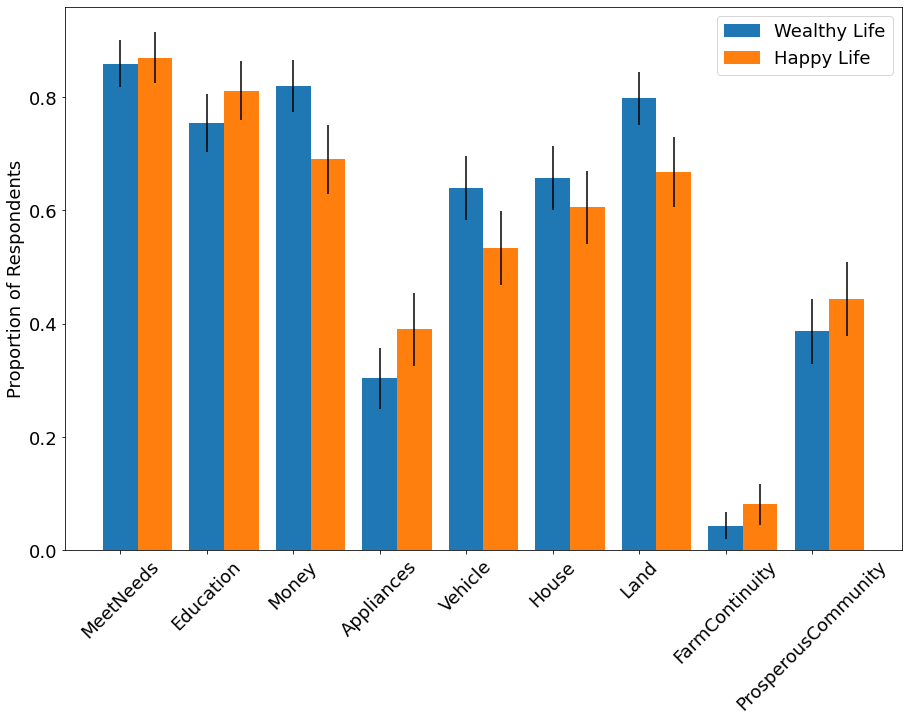

In [44]:
#Bar Graph of Aspirations by Question Type (Wealthy/Happy Life)
wealthylife = {key : 0 for key in codes.values()}
happylife = {key : 0 for key in codes.values()}
w_err = {key : 0 for key in codes.values()}
h_err = {key : 0 for key in codes.values()}

for key in codes.values():
    wealthylife[key] = aspirations.loc[aspirations['Wealthy'] == True][key].mean()
    happylife[key] = aspirations.loc[aspirations['Wealthy'] == False][key].mean()
    w_err[key] = confint(aspirations.loc[aspirations['Wealthy'] == True][key])
    h_err[key] = confint(aspirations.loc[aspirations['Wealthy'] == False][key])

# Figure Size
f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(wealthylife))

ax.bar(xpos, wealthylife.values(), width=0.4, yerr = w_err.values(), label='Wealthy Life')
ax.bar(xpos+0.4, happylife.values(), width=0.4, yerr = h_err.values(), label='Happy Life')

#labels = list(wealthylife.keys())
ax.set_ylabel('Proportion of Respondents', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)
#plt.show()

plt.savefig('Aspirations_summary.png', bbox_inches='tight')

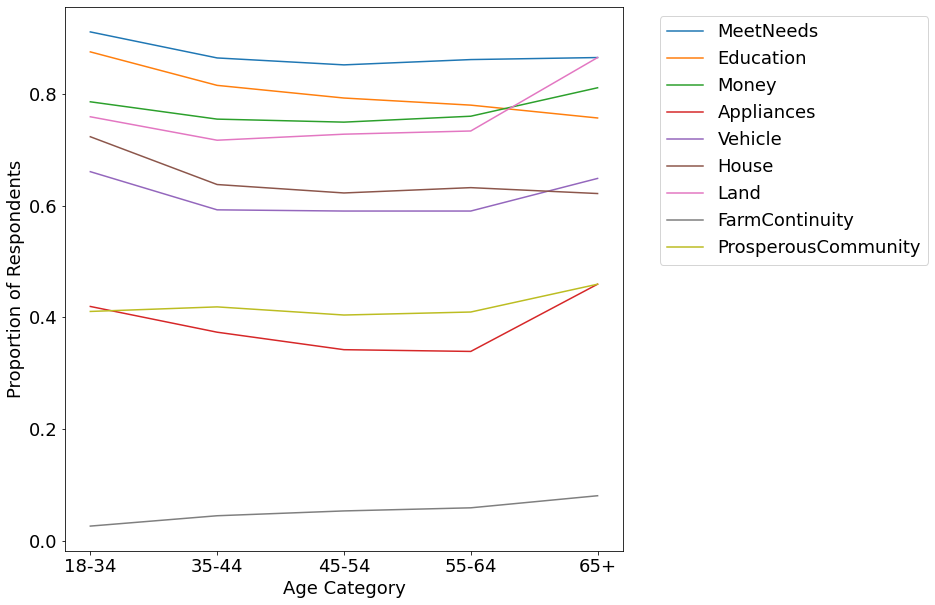

In [45]:
#Line Graph of Aspirations by Age Category

agecutoffs = [35, 45, 55, 65] #Cutoffs used in Nepali Census to delimit age categories
agecats = len(agecutoffs) + 1
ratings = {key : [] for key in codes.values()}

for key in ratings:
    for i in range(agecats):
        if i < (agecats - 1):
            ratings[key].append(aspirations.loc[aspirations['Age'] < agecutoffs[i]][key].mean())
        else:
            ratings[key].append(aspirations.loc[aspirations['Age'] > agecutoffs[i-1]][key].mean())
            
xpos = np.arange(0, agecats, 1)

f, ax = plt.subplots(figsize=[10,10])


for key in ratings:
    
    ax.plot(xpos, ratings[key], label=key)
    
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))    
ax.set_xticklabels(['18-34', '35-44', '45-54','55-64','65+'], fontsize=18)
ax.set_xlabel('Age Category', fontsize=18)
ax.set_ylabel('Proportion of Respondents', fontsize=18)
plt.yticks(size=18)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
#plt.show()

plt.savefig('Aspirations_age.png', bbox_inches='tight')

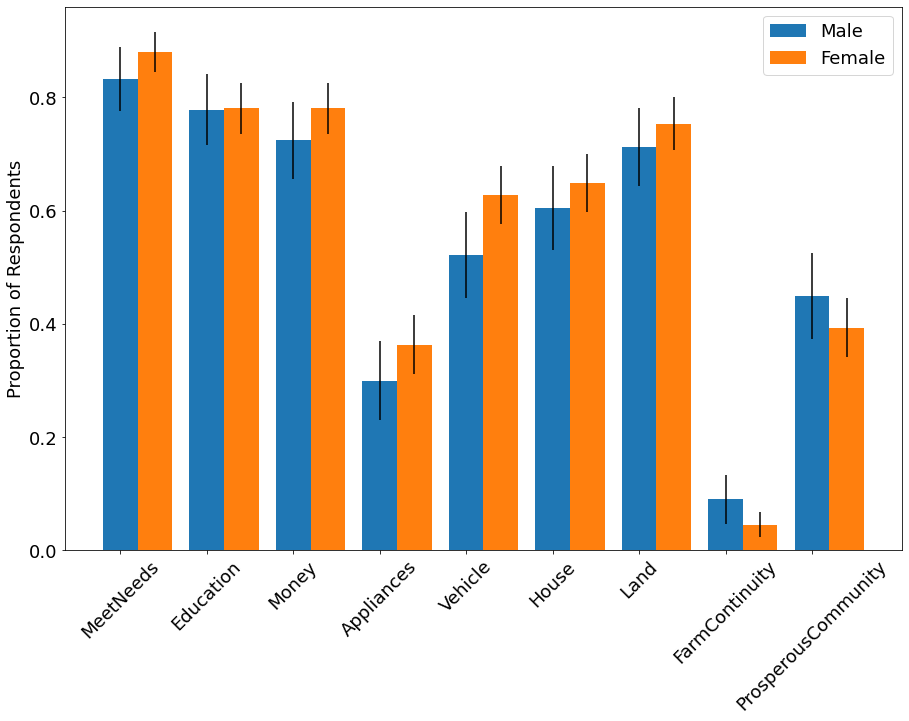

In [46]:
#Gender breakdown
aspirations.head()
m_aspirations = np.zeros(len(codes))
f_aspirations = np.zeros(len(codes))

m_err = np.zeros(len(codes))
f_err = np.zeros(len(codes))



for i, key in enumerate(codes.values()):
    m_aspirations[i] = aspirations.loc[aspirations['Gender'] == 0][key].mean()
    f_aspirations[i] = aspirations.loc[aspirations['Gender'] == 1][key].mean()
    m_err[i] = confint(aspirations.loc[aspirations['Gender'] == 0][key])
    f_err[i] = confint(aspirations.loc[aspirations['Gender'] == 1][key])

f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(codes))


ax.bar(xpos, m_aspirations, width=0.4, yerr = m_err, label='Male')
ax.bar(xpos+0.4, f_aspirations, width=0.4, yerr = f_err, label='Female')

ax.set_ylabel('Proportion of Respondents', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

#plt.show()
plt.savefig('Aspirations_Gender.png', bbox_inches='tight')


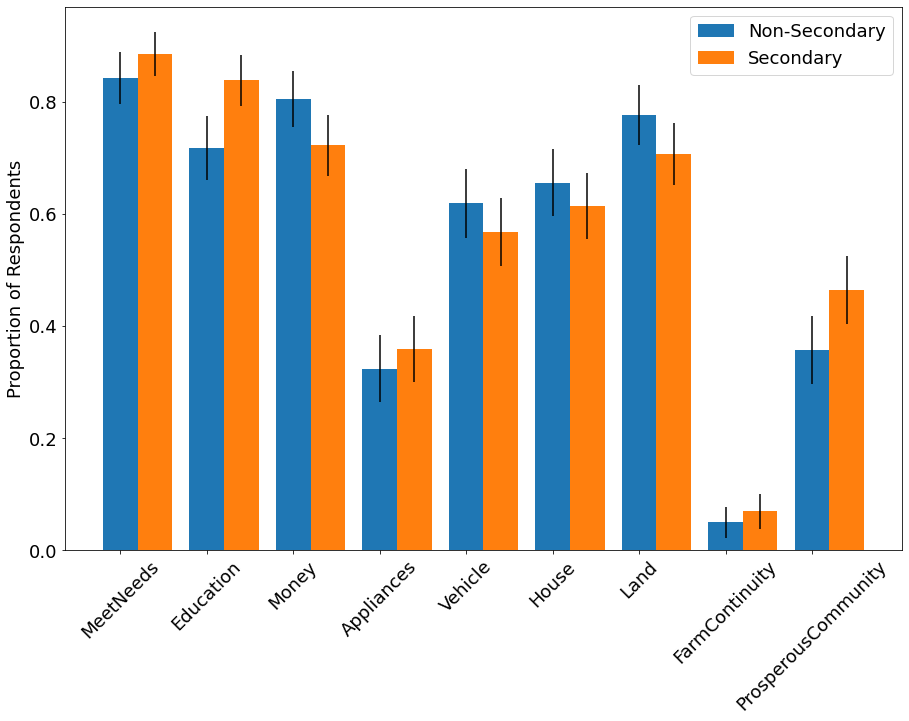

In [48]:
#Education Breakdown

#Gender breakdown
aspirations.head()
secondary_aspirations = np.zeros(len(codes))
nonsecondary_aspirations = np.zeros(len(codes))

s_err = np.zeros(len(codes))
n_err = np.zeros(len(codes))



for i, key in enumerate(codes.values()):
    nonsecondary_aspirations[i] = aspirations.loc[aspirations['Secondary'] == 0][key].mean()
    secondary_aspirations[i] = aspirations.loc[aspirations['Secondary'] == 1][key].mean()
    n_err[i] = confint(aspirations.loc[aspirations['Secondary'] == 0][key])
    s_err[i] = confint(aspirations.loc[aspirations['Secondary'] == 1][key])

f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(codes))


ax.bar(xpos, nonsecondary_aspirations, width=0.4, yerr = n_err, label='Non-Secondary')
ax.bar(xpos+0.4, secondary_aspirations, width=0.4, yerr = s_err, label='Secondary')

ax.set_ylabel('Proportion of Respondents', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

#plt.show()
plt.savefig('Aspirations_Education.png', bbox_inches='tight')



# Climate Risk Perception and Income Proportions by Aspiration

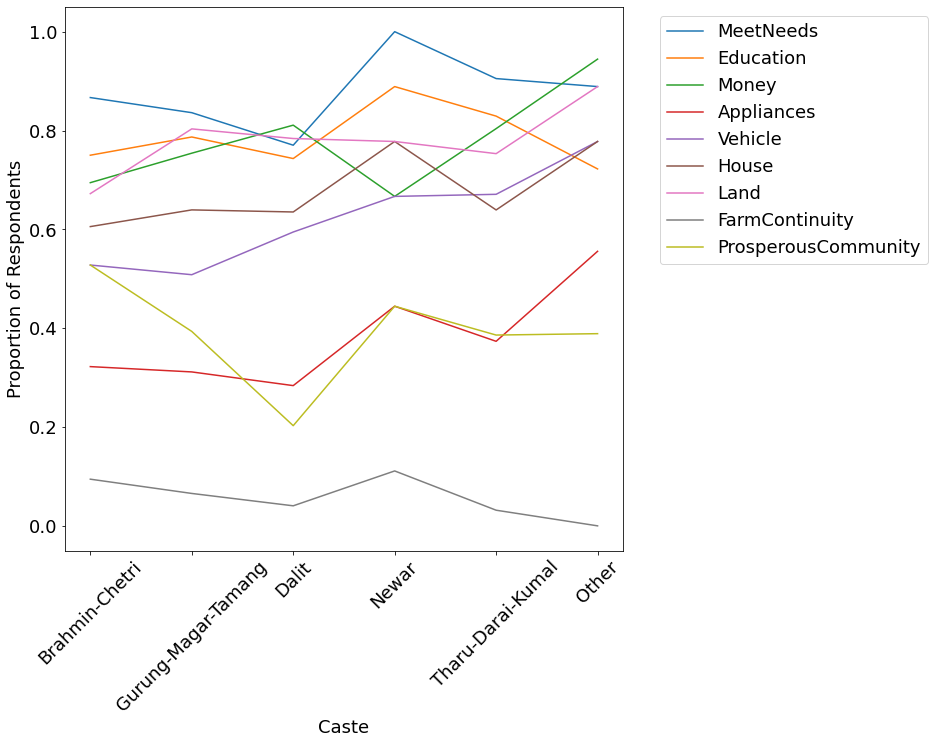

In [58]:
#Line Graph of Aspirations by Caste

castes = {'1': 'Brahmin-Chetri', '2': 'Gurung-Magar-Tamang', '3': 'Dalit', '4': 'Newar', '5': 'Tharu-Darai-Kumal', '6': 'Other'}
castecats = len(castes)
ratings = {key : [] for key in codes.values()}

for key in ratings:
    for k in castes:
        ratings[key].append(aspirations.loc[aspirations['Caste']==float(k)][key].mean())
            
xpos = np.arange(0, castecats, 1)

f, ax = plt.subplots(figsize=[10,10])


for key in ratings:
    
    ax.plot(xpos, ratings[key], label=key)
    
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))    
ax.set_xticklabels(castes.values(), fontsize=18, rotation=45)
ax.set_xlabel('Caste', fontsize=18)
ax.set_ylabel('Proportion of Respondents', fontsize=18)
plt.yticks(size=18)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
#plt.show()

plt.savefig('Aspirations_Caste.png', bbox_inches='tight')

In [12]:
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
incomes = pd.read_csv('MeanIncomes.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')

merge1 = pd.merge(aspirations, climaterisk, on='HHID')
merge2 = pd.merge(merge1, livelihoodrisk, on='HHID')
merge3 = pd.merge(merge2, incomes, on='HHID')
merge4 = pd.merge(merge3, adaptation, on='HHID')

riskdf = merge4.dropna()

riskdf

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_68370/1676220919.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge4 = pd.merge(merge3, adaptation, on='HHID')


,HHID,Gender,Age,Caste,Wealthy,MeetNeeds,Education,Money,Appliances,Vehicle,...,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies
0,2301006,0,43,1,False,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2301007,1,55,1,True,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2301013,1,49,3,False,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2301016,1,55,1,True,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2301017,1,47,1,True,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,47,6,False,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
496,2611115,1,36,6,True,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
497,2611117,1,44,3,True,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
498,2611118,1,56,3,True,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


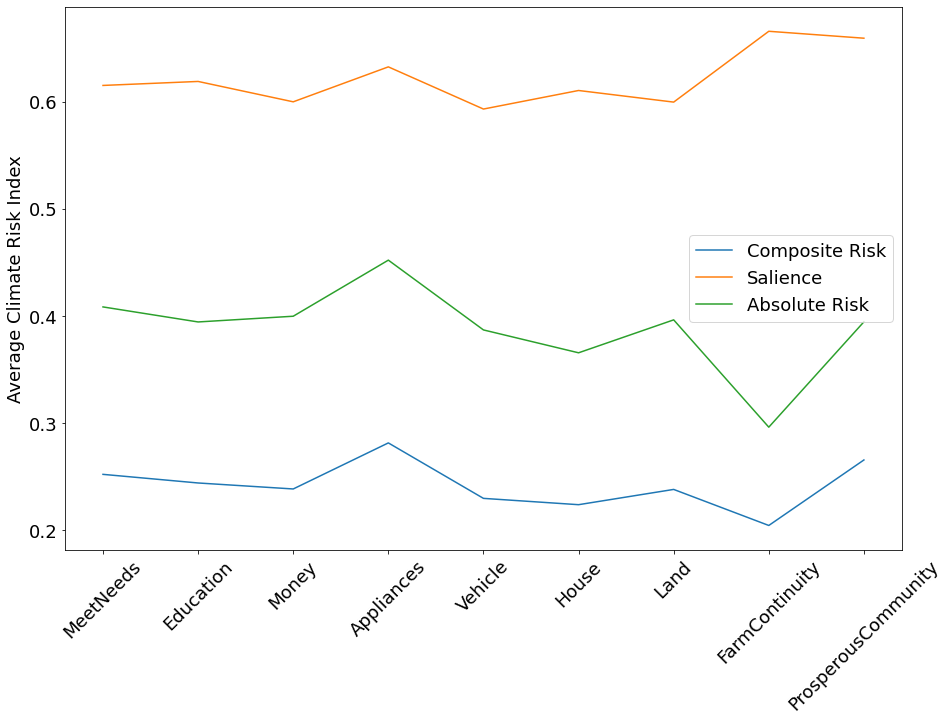

In [10]:
#Plotting average climate risk index by aspiration level

compositerisk = np.zeros(len(codes))
salience = np.zeros(len(codes))
absrisk = np.zeros(len(codes))

flag = False

for i, key in enumerate(codes.values()):
    compositerisk[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['CompositeRisk'].mean()
    salience[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['SalienceIndex'].mean()
    absrisk[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Risk_Norm'].mean()
    
f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(codes))

ax.plot(xpos, compositerisk, label='Composite Risk')
ax.plot(xpos, salience, label='Salience')
ax.plot(xpos, absrisk, label='Absolute Risk')
ax.set_ylabel('Average Climate Risk Index', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

#plt.show()

plt.savefig('ClimateRiskbyAspiration_Happy.png', bbox_inches='tight')

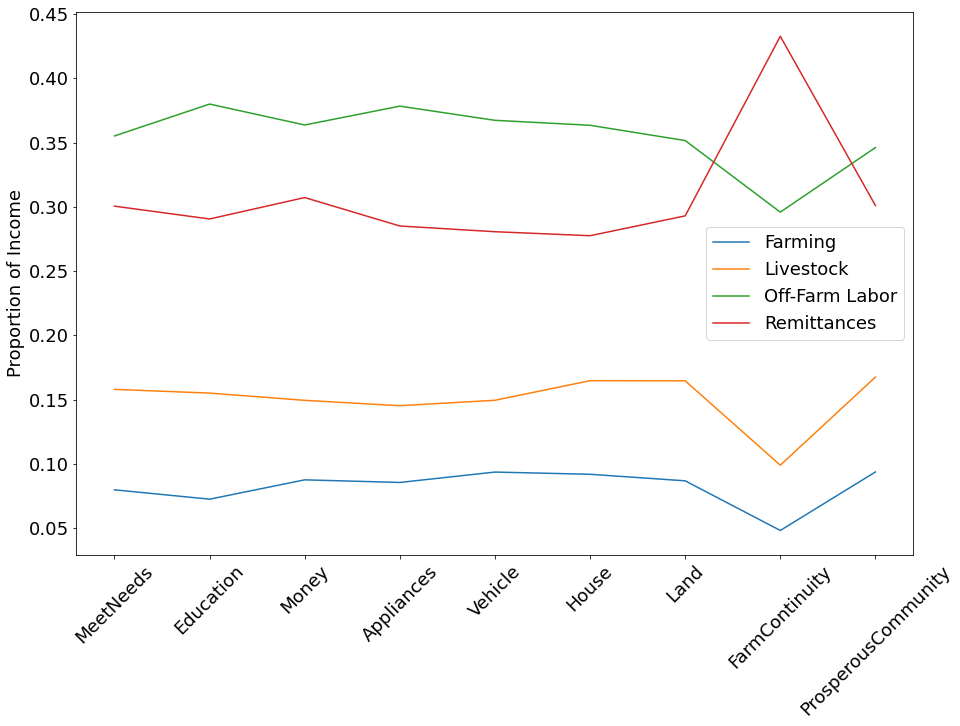

In [11]:
#Plotting average climate risk index by aspiration level

farmprop = np.zeros(len(codes))
livestockprop = np.zeros(len(codes))
laborprop = np.zeros(len(codes))
remittanceprop = np.zeros(len(codes))

flag = False

for i, key in enumerate(codes.values()):
    farmprop[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Farm_Prop'].mean()
    livestockprop[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Livestock_Prop'].mean()
    laborprop[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Off-Farm Labor_Prop'].mean()
    remittanceprop[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Remittances_Prop'].mean()
    
f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(codes))

ax.plot(xpos, farmprop, label='Farming')
ax.plot(xpos, livestockprop, label='Livestock')
ax.plot(xpos, laborprop, label='Off-Farm Labor')
ax.plot(xpos, remittanceprop, label='Remittances')
ax.set_ylabel('Proportion of Income', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

#plt.show()

plt.savefig('IncomePropbyAspiration_Happy.png', bbox_inches='tight')

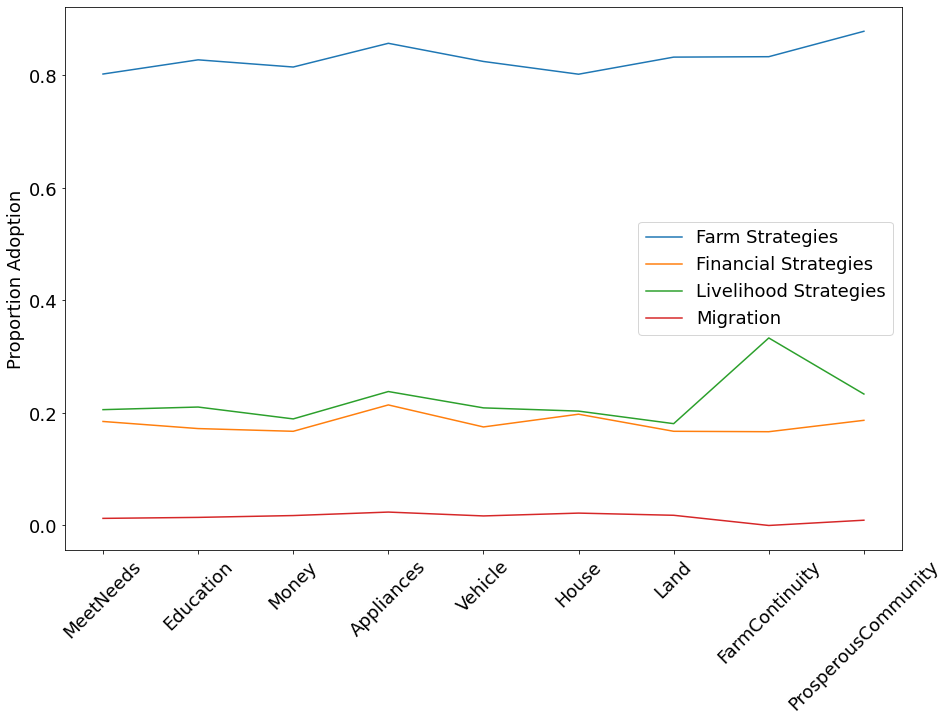

In [29]:
#Adaptation Strategies by Aspiration

farmstrategies = np.zeros(len(codes))
financialstrategies = np.zeros(len(codes))
livelihoodstrategies = np.zeros(len(codes))
migration = np.zeros(len(codes))

flag = True

for i, key in enumerate(codes.values()):
    farmstrategies[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['FarmStrategies'].mean()
    livelihoodstrategies[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['LivelihoodStrategies'].mean()
    financialstrategies[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['FinancialStrategies'].mean()
    migration[i] = riskdf.loc[(riskdf['Wealthy'] == flag) & (riskdf[key] == 1)]['Migration'].mean()
f, ax = plt.subplots(figsize =(15, 10))
xpos = np.arange(0, len(codes))

ax.plot(xpos, farmstrategies, label='Farm Strategies')
ax.plot(xpos, financialstrategies, label='Financial Strategies')
ax.plot(xpos, livelihoodstrategies, label='Livelihood Strategies')
ax.plot(xpos, migration, label='Migration')
ax.set_ylabel('Proportion Adoption', fontsize=18)
plt.xticks(np.arange(min(xpos), max(xpos) + 1, 1.0))
ax.set_xticklabels(['MeetNeeds', 'Education', 'Money', 'Appliances', 'Vehicle', 'House', 'Land', 'FarmContinuity', 'ProsperousCommunity'], fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

plt.show()

#plt.savefig('AdaptationbyAspiration_Wealthy.png', bbox_inches='tight')

## Principal Components Analysis

In [24]:
from sklearn.preprocessing import StandardScaler

features = codes.values()

x = aspirations.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

array([[ 0.39674602, -1.88293774,  0.55887025, ...,  0.59274898,
        -0.25264558, -0.83706647],
       [ 0.39674602, -1.88293774, -1.78932408, ...,  0.59274898,
        -0.25264558,  1.19464826],
       [ 0.39674602, -1.88293774,  0.55887025, ...,  0.59274898,
        -0.25264558, -0.83706647],
       ...,
       [ 0.39674602, -1.88293774, -1.78932408, ...,  0.59274898,
        -0.25264558, -0.83706647],
       [ 0.39674602, -1.88293774,  0.55887025, ...,  0.59274898,
        -0.25264558, -0.83706647],
       [ 0.39674602,  0.531085  ,  0.55887025, ...,  0.59274898,
        -0.25264558,  1.19464826]])

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.reset_index()
principalDf['HHID'] = aspirations['HHID']
principalDf

,principal component 1,principal component 2,HHID
0,0.633545,-1.783623,2301006
1,1.128145,0.119256,2301007
2,0.633545,-1.783623,2301013
3,-0.650517,-0.986341,2301016
4,1.955113,0.959999,2301017
...,...,...,...
495,1.771793,0.531025,2611114
496,-0.650517,-0.986341,2611115
497,0.529845,-0.442407,2611117
498,1.526151,-1.508926,2611118


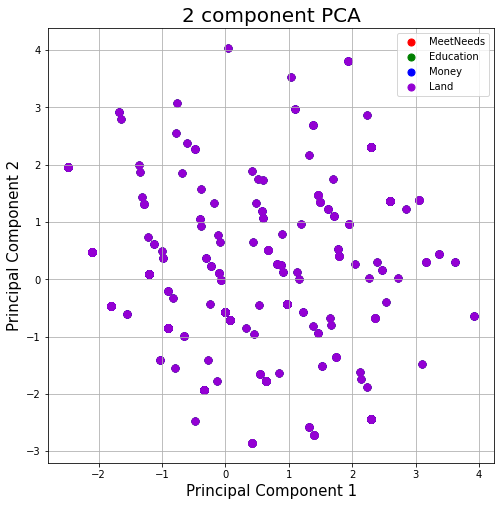

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['MeetNeeds', 'Education', 'Money', 'Land']
colors = ['r', 'g', 'b', 'darkviolet']
for target, color in zip(targets,colors):
    #indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [42]:
final_df = pd.merge(aspirations,principalDf, on='HHID')
final_df.to_csv('Aspirations.csv')